### k means clustering focuses on distance
### hierarchical focuses on similar points 
### dbscan focuses on density within that eps and core and considering min_sample(min_points)

Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Acknowledgements
From Udemy's Machine Learning A-Z course.

I am new to Data science field and want to share my knowledge to others

https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# No missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [26]:
# unique values
len(df['CustomerID'].unique()) 

200

In [27]:
# So here CustomerId is unique for all rows so we can drop it not necessary

In [28]:
df = df.drop('CustomerID',axis=1)

In [29]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [30]:
# Gender is object type so we have to convert it into numeric 
df = pd.get_dummies(df,drop_first=True)

In [31]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [32]:
# now all columns are in numeric

# Data visualization

In [83]:
df['Gender_Male'].value_counts()

0    112
1     88
Name: Gender_Male, dtype: int64

In [84]:
# More are Females than males

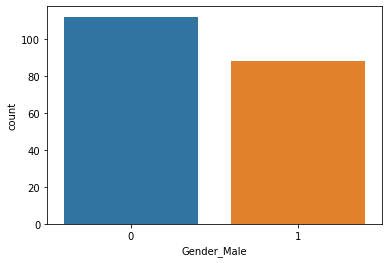

In [81]:
sns.countplot(data=df,x='Gender_Male')

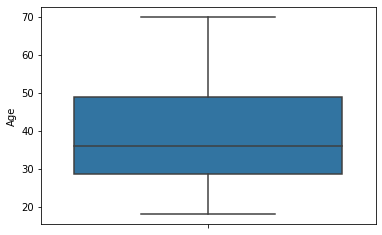

In [36]:
# Want to see which age grp is more visiting mall visually
sns.boxplot(data=df,y='Age')

In [37]:
# so more customers are from 35 and 50 age grp and min age is around 20 and max is around 70 

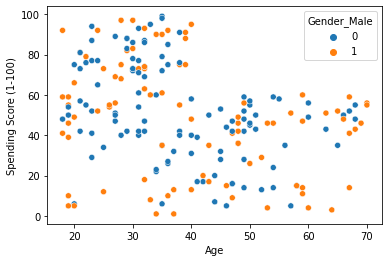

In [41]:
# now age vs spending score and color by gender
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender_Male')

In [42]:
# here more way of scatter data randomly cleary we can't judge 
# but we can say that for less than 40 age more customers are having high spending score i.e good behaviour and more purchased data

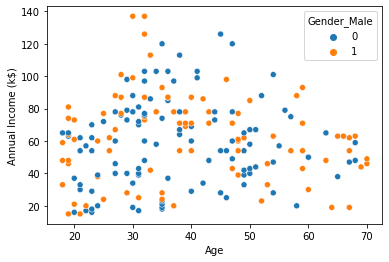

In [46]:
# Age vs annual income
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',hue='Gender_Male')

In [47]:
# here also we can't judge
# there are some outliers also see corresponds to around 140 and 120 

In [48]:
# correlation between features

In [75]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Gender_Male,0.060867,0.056410,-0.058109,1.000000


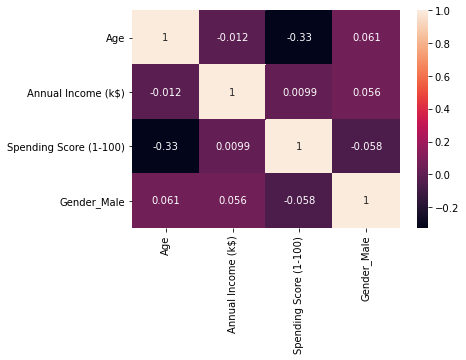

In [55]:
# better way to visualize with heatmap
# plt.figure(figsize=(2,3),dpi=200) # dpi for sharpness
sns.heatmap(df.corr(),annot=True)

In [59]:
# more correlated feature is age and gender
df.corr()['Age'].sort_values()

Spending Score (1-100)   -0.327227
Annual Income (k$)       -0.012398
Gender_Male               0.060867
Age                       1.000000
Name: Age, dtype: float64

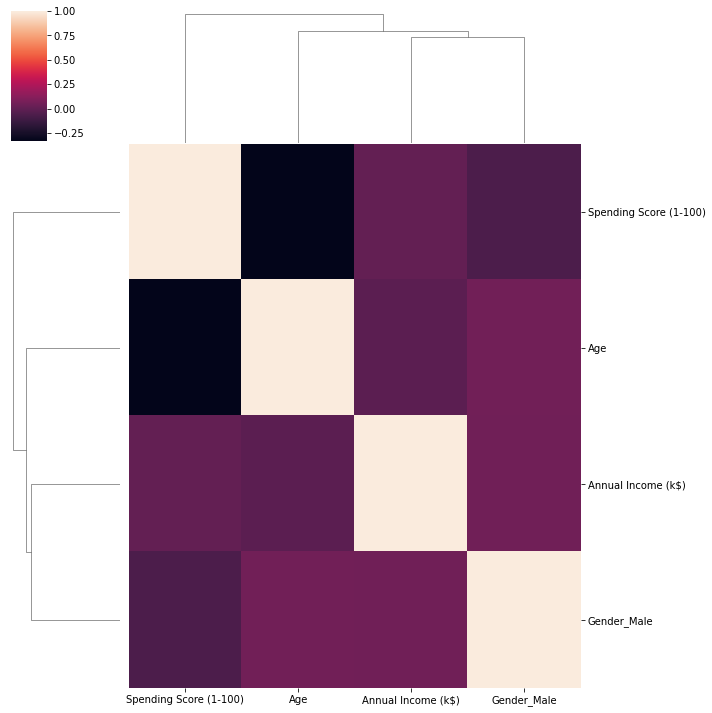

In [70]:
sns.clustermap(df.corr())

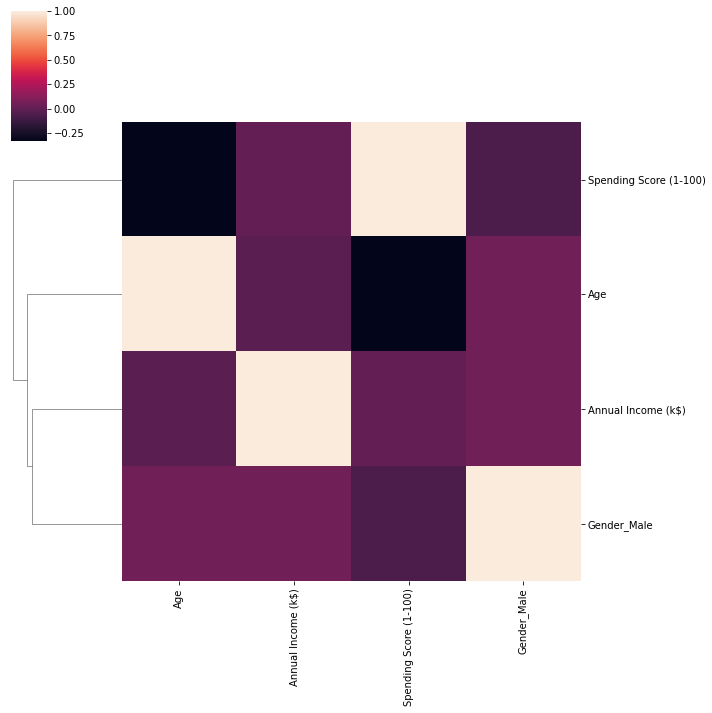

In [72]:
sns.clustermap(df.corr(),col_cluster=False)

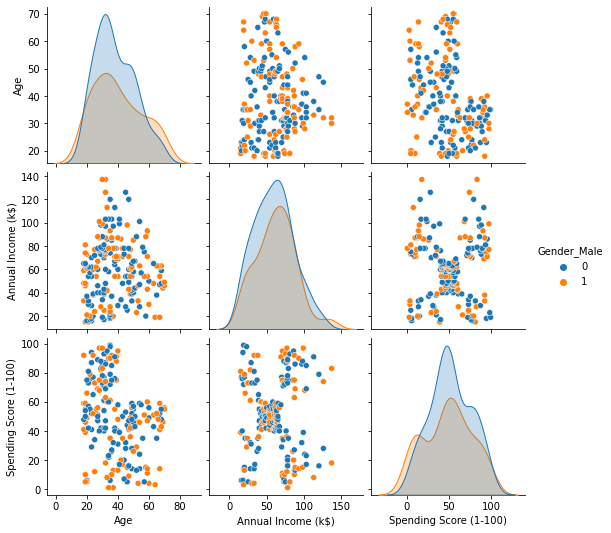

In [74]:
# pairplot
sns.pairplot(df,hue='Gender_Male')

In [85]:
# Create model

In [86]:
# K-means clustering

In [87]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [89]:
# scaling --> becuase data values are not in same range

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
scaled_df = scaler.fit_transform(df) # this gives array so convert it into dataframe

In [96]:
scaled_df = pd.DataFrame(data=scaled_df,index=df.index,columns=df.columns)

In [97]:
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [98]:
# now all data values are in similar ranges

In [99]:
# before applying k-means clustering algorithm we will check which k value will be better by for loop

# elbow/knee method
from sklearn.cluster import KMeans

ssd = []

for k in range(2,10):
    # we can increase k value like 2 to 40 but it may take long time to run depend on system ram
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    
    ssd.append(model.inertia_) # SSD(sum of squared distance) point --> cluster center

In [100]:
ssd

[588.8026767824932,
 476.7732065607641,
 386.7147857740689,
 325.74623385425554,
 276.5109056686635,
 236.2479853671619,
 199.7166255966768,
 174.12493921599284]

In [101]:
# see here we got ssd i.e distance differences as k values increases

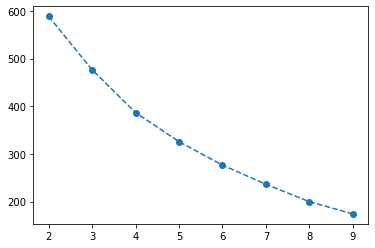

In [102]:
plt.plot(range(2,10),ssd,'o--')

In [103]:
# see here as k values increase ssd decreases so around 7 to 9 we can take as k

In [104]:
pd.Series(ssd)

0    588.802677
1    476.773207
2    386.714786
3    325.746234
4    276.510906
5    236.247985
6    199.716626
7    174.124939
dtype: float64

In [105]:
pd.Series(ssd).diff()

0           NaN
1   -112.029470
2    -90.058421
3    -60.968552
4    -49.235328
5    -40.262920
6    -36.531360
7    -25.591686
dtype: float64

In [106]:
# see but more drop is from at 2 to 3 means at k = 4 then less drop from k = 4 so can k=4 will be best choice but 100% is not sure bcoz this is unsupervised part

In [107]:
model = KMeans(n_clusters=4)

In [108]:
model.fit(scaled_df)

KMeans(n_clusters=4)

In [109]:
model.labels_

array([0, 0, 1, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 3, 2, 3, 2, 0, 1, 3, 1, 3, 1, 3, 1, 0, 2, 3,
       1, 3, 1, 3, 3, 3, 1, 0, 3, 2, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 3, 2, 1, 1, 1, 2, 0, 1, 2, 3, 1, 2, 0, 2, 1, 3, 2, 1, 3,
       3, 1, 1, 0, 2, 1, 3, 0, 1, 3, 2, 0, 3, 1, 2, 0, 2, 3, 1, 2, 2, 2,
       2, 3, 1, 0, 3, 3, 1, 1, 1, 1, 0, 1, 3, 0, 3, 3, 2, 0, 2, 0, 2, 0,
       3, 3, 2, 3, 1, 0, 2, 3, 1, 0, 3, 3, 2, 0, 2, 3, 1, 0, 2, 0, 1, 3,
       1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 1, 0, 2, 0, 2, 0, 1, 3,
       2, 0, 2, 0, 1, 3, 2, 3, 1, 0, 1, 0, 1, 3, 1, 3, 2, 3, 1, 3, 1, 0,
       2, 0])

In [110]:
df['Cluster'] = model.labels_

In [111]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,3
4,31,17,40,0,3
...,...,...,...,...,...
195,35,120,79,0,3
196,45,126,28,0,1
197,32,126,74,1,0
198,32,137,18,1,2


In [113]:
df.corr()['Cluster'].sort_values()

Gender_Male              -0.418659
Age                      -0.083158
Annual Income (k$)       -0.012211
Spending Score (1-100)    0.022359
Cluster                   1.000000
Name: Cluster, dtype: float64

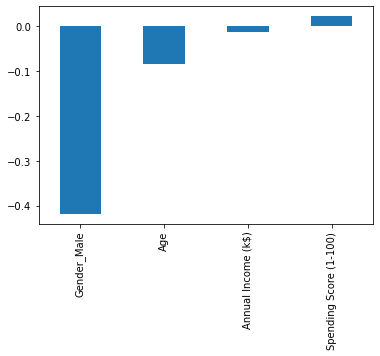

In [116]:
# plt.figure(figsize=(12,6),dpi=200)
df.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

# Using DBSCAN

In [118]:
from sklearn.cluster import DBSCAN

In [119]:
# To choose best eps and min_sample hyperparameter

In [120]:
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [121]:
percentage_outliers = []
number_of_outliers = []

for eps in np.linspace(0.001,5,100):
    dbscan = DBSCAN(eps)
    dbscan.fit(scaled_df)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    percent = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    percentage_outliers.append(percent)

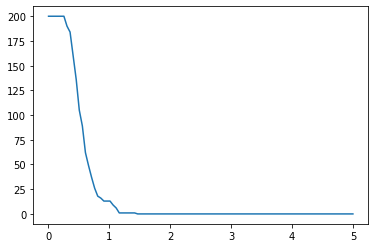

In [122]:
sns.lineplot(x=np.linspace(0.001,5,100),y=number_of_outliers)

Text(0, 0.5, 'percentage of points classified as outliers')

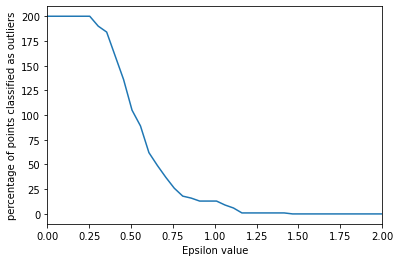

In [123]:
# so from around 1 it is constant 
sns.lineplot(x=np.linspace(0.001,5,100),y=number_of_outliers)
plt.xlim(0,2)
plt.xlabel("Epsilon value")
plt.ylabel("percentage of points classified as outliers")

Text(0, 0.5, 'percentage of points classified as outliers')

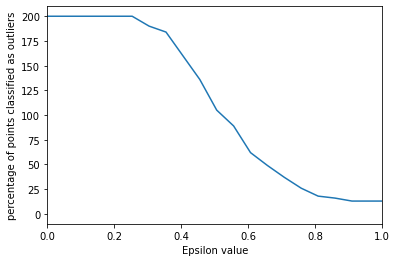

In [124]:
# now we can clearly visualize that from 0.75 not decrease plot more so we can take eps = 0.75 
#  or around 0.8 or around 1.25 which is very less outliers so either take from these values
sns.lineplot(x=np.linspace(0.001,5,100),y=number_of_outliers)
plt.xlim(0,1)
plt.xlabel("Epsilon value")
plt.ylabel("percentage of points classified as outliers")

In [127]:
# now we can clearly see that at 0.8 less outliers are there so take it 
len(scaled_df.columns)

4

In [129]:
final_dbscan = DBSCAN(eps=0.8,min_samples=2*len(scaled_df.columns))
final_dbscan.fit(scaled_df)

DBSCAN(eps=0.8, min_samples=8)

In [130]:
final_dbscan.labels_

array([-1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  0,  0,  1,  2,  0,  0,
        2,  0,  1,  0,  0,  0,  1,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  2,  1,  0,  0,  2,  0,  0,  1,  2,  0,  0,
        1,  2,  1,  0,  0,  1,  1,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  3,  0,  0,  1,  3, -1,  3,  4,  3,  0,  0, -1,  0,
       -1,  3, -1,  0, -1,  3,  0,  0, -1,  3,  1,  0, -1,  3,  4,  3, -1,
        0, -1,  0,  4,  0, -1,  0,  0,  0, -1,  0,  4,  0,  4,  0, -1,  3,
        4,  3,  4,  3, -1,  0, -1,  3, -1,  3, -1,  0,  4,  0, -1,  3, -1,
       -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1], dtype=int64)

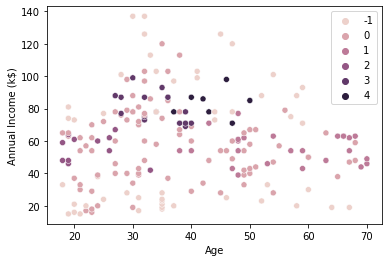

In [134]:
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',hue=final_dbscan.labels_)

In [135]:
# now see DBSCAN automatically cluster well and finds n_clusters automatically which arises problem in k-means
# and see we said that around 140 and 120 k dollars there are some outliers which finds by DBSCAN

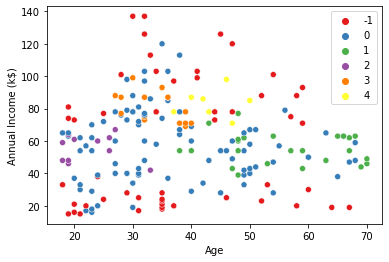

In [136]:
# to find outlier better
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',hue=final_dbscan.labels_,palette='Set1')

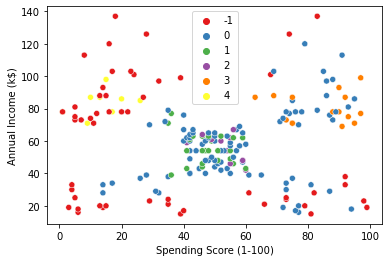

In [139]:
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue=final_dbscan.labels_,palette='Set1')
# see closest points are cluster well within that range

In [140]:
# if we want to decrease outliers increase eps value as discuss in plot take eps = 1.25 

In [142]:
df['DBSCAN Clusters'] = final_dbscan.labels_

In [143]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,DBSCAN Clusters
0,19,15,39,1,0,-1
1,21,15,81,1,0,-1
2,20,16,6,0,1,-1
3,23,16,77,0,3,0
4,31,17,40,0,3,-1
...,...,...,...,...,...,...
195,35,120,79,0,3,0
196,45,126,28,0,1,-1
197,32,126,74,1,0,-1
198,32,137,18,1,2,-1


In [144]:
# -1 cluster means outliers

### To compare the statistical mean of the clusters and outliers 

In [145]:
new_df = df.drop('Cluster',axis=1)
df_mean = new_df.groupby('DBSCAN Clusters').mean()

In [146]:
df_mean

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
DBSCAN Clusters,,,,
-1,37.846154,60.173077,33.788462,0.576923
0,37.322222,57.455556,57.533333,0.000000
1,56.000000,55.291667,47.708333,1.000000
2,22.636364,55.545455,53.272727,1.000000
3,33.933333,80.266667,84.200000,1.000000
4,42.625000,83.750000,13.875000,1.000000


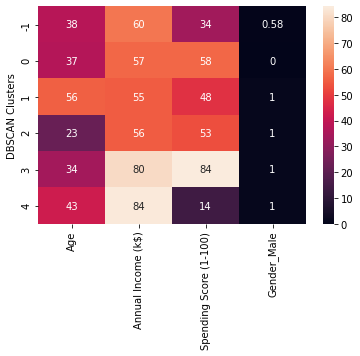

In [147]:
sns.heatmap(df_mean,annot=True)

#### so we can observe here that -1 means high values high income which comes in mall for spending which is havong 0 anf 3 cluster more like to come in mall so we can see that 3 and 4 clusters are more often to come in mall

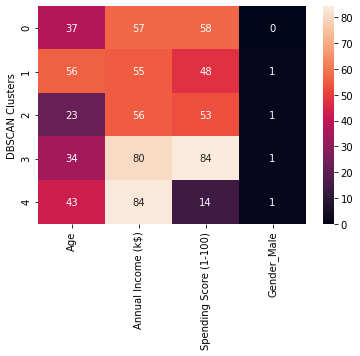

In [149]:
sns.heatmap(df_mean.loc[[0,1,2,3,4]],annot=True)

##### Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
new_scaler = MinMaxScaler()

In [152]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df_mean)
scaled_means = pd.DataFrame(data,df_mean.index,df_mean.columns)

In [153]:
scaled_means

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
DBSCAN Clusters,,,,
-1,0.455879,0.171528,0.283163,0.576923
0,0.440176,0.076037,0.620808,0.000000
1,1.000000,0.000000,0.481100,1.000000
2,0.000000,0.008918,0.560224,1.000000
3,0.338601,0.877599,1.000000,1.000000
4,0.599114,1.000000,0.000000,1.000000


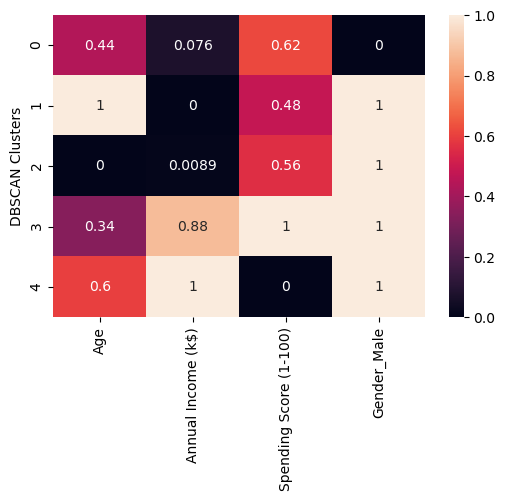

In [157]:
plt.figure(dpi=100)
sns.heatmap(scaled_means.loc[[0,1,2,3,4]],annot=True)